## EDA

### Loading libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
actions = pd.read_excel("data/actions.xlsx")

In [4]:
actions.head()

,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_id,client_is_present,client_is_invited
0,a654760,Collection,Collection,2022-04-07,2022,2022-04-11,2022,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,In store,Exclusive Offer,c23083988,1,1
1,a979979,Collection,Collection,2021-10-20,2021,2021-10-21,2021,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c40865409,1,1
2,a803469,Collection,Collection,2020-10-29,2020,2020-10-29,2020,Spring Collection,Men's Fashion,Retail,In store,Social Gathering,c95435465,1,1
3,a887515,Collection,Collection,2022-01-11,2022,2022-01-11,2022,Formal Retail Action,Men's Fashion,Retail,In store,Social Gathering,c58792918,1,1
4,a233620,Collection,Collection,2021-05-27,2021,2021-06-21,2021,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,NaN,Exclusive Offer,c34394230,1,1


In [5]:
clients = pd.read_excel('data/clients.xlsx')

In [6]:
clients.head()

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable
0,c41404743,BN,NaN,NaN,NaN,0,0,0,1,1
1,c65630254,CA,NaN,NaN,NaN,0,0,0,1,1
2,c89796498,NL,NaN,NaN,NaN,0,0,0,1,1
3,c03959902,SE,NaN,NaN,NaN,0,0,0,1,1
4,c39809280,BG,NaN,NaN,NaN,0,0,0,1,1


In [7]:
transactions = pd.read_excel('data/transactions.xlsx')

In [8]:
transactions.head()

,client_id,transaction_id,transaction_date,product_quantity,gross_amount_euro,product_category,product_subcategory,product_style
0,c17974679,t11288118,2020-07-25,1,3044,Women Ready-to-Wear,Unknown,Casual Style
1,c17974679,t93389142,2020-06-20,1,569,Women Accessory,Unknown,Stylish Fashion
2,c17974679,t62924895,2021-01-13,1,7727,Women Bags,Unknown,Leather
3,c17974679,t93389142,2020-06-20,1,3954,Women Ready-to-Wear,Unknown,Casual Style
4,c17974679,t33368160,2021-05-03,1,1541,Women Ready-to-Wear,bottom segment,Casual Style


### Dataframes shapes

In [9]:
print(f"The ACTIONS dataframe has {actions.shape[1]} features and {actions.shape[0]} entries.")
print(f"The CLIENTS dataframe has {clients.shape[1]} features and {clients.shape[0]} entries.")
print(f"The TRANSACTIONS dataframe has {transactions.shape[1]} features and {transactions.shape[0]} entries.")

The ACTIONS dataframe has 15 features and 10000 entries.
The CLIENTS dataframe has 10 features and 28751 entries.
The TRANSACTIONS dataframe has 8 features and 54638 entries.


### Unique clients

In [10]:
print(f"Unique clients in TRANSACTIONS dataframe: {transactions['client_id'].nunique()}")
print(f"Unique clients in CLIENTS dataframe: {clients['client_id'].nunique()}")
print(f"Unique clients in ACTIONS dataframe: {actions['client_id'].nunique()}")

Unique clients in TRANSACTIONS dataframe: 13884
Unique clients in CLIENTS dataframe: 28751
Unique clients in ACTIONS dataframe: 8871


In [11]:
print(f"Percentage of clients having made transactions: {round(transactions['client_id'].nunique() / clients['client_id'].nunique(), 3)*100}%")

Percentage of clients having made transactions: 48.3%


In [13]:
print(f"Mean transaction amount: {transactions['gross_amount_euro'].mean()}")

Mean transaction amount: 3443.0228778505802


In [16]:
print(f"Value counts for invited clients in TRANSACTIONS dataframe: \n \n {actions['client_is_invited'].value_counts()}")

Value counts for invited clients in TRANSACTIONS dataframe: 
 
 client_is_invited
1    10000
Name: count, dtype: int64


In [17]:
print(f"Value counts for present clients in TRANSACTIONS dataframe: \n \n {actions['client_is_present'].value_counts()}")

Value counts for present clients in TRANSACTIONS dataframe: 
 
 client_is_present
1    5437
0    4563
Name: count, dtype: int64


## Analyzing the behavior of clients who have been invited: presence and transactional behavior.

In [18]:
transactions_groupedby = transactions.groupby('client_id', as_index=False)['gross_amount_euro'].count()

In [19]:
merged_df = pd.merge(left=actions, right=transactions_groupedby, on='client_id', how='left').fillna(0)

In [20]:
merged_df.head()

,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_id,client_is_present,client_is_invited,gross_amount_euro
0,a654760,Collection,Collection,2022-04-07,2022,2022-04-11,2022,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,In store,Exclusive Offer,c23083988,1,1,0.0
1,a979979,Collection,Collection,2021-10-20,2021,2021-10-21,2021,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c40865409,1,1,0.0
2,a803469,Collection,Collection,2020-10-29,2020,2020-10-29,2020,Spring Collection,Men's Fashion,Retail,In store,Social Gathering,c95435465,1,1,0.0
3,a887515,Collection,Collection,2022-01-11,2022,2022-01-11,2022,Formal Retail Action,Men's Fashion,Retail,In store,Social Gathering,c58792918,1,1,0.0
4,a233620,Collection,Collection,2021-05-27,2021,2021-06-21,2021,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,0,Exclusive Offer,c34394230,1,1,0.0


### Number of clients invited who were present at an event

In [21]:
merged_df[merged_df['client_is_present'] == 1].client_id.nunique()

4508

In [28]:
# Presence == 1 & transaction amount > 0

clients_present_transac = merged_df[(merged_df['client_is_present'] == 1) & (merged_df['gross_amount_euro'] > 0)]
print(f"Presence == 1 & transaction amount > 0: {clients_present_transac['client_id'].nunique()} ")

Presence == 1 & transaction amount > 0: 2651 


In [29]:
# Presence == 1 & no transaction

clients_present_notransac = merged_df[(merged_df['client_is_present'] == 1) & (merged_df['gross_amount_euro'] == 0)]
print(f"Presence == 1 & no transaction: {clients_present_notransac['client_id'].nunique()}")

Presence == 1 & no transaction: 1857


## Bar plot

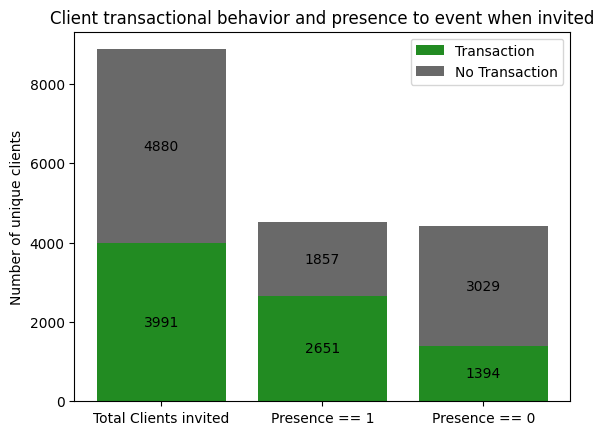

In [39]:
to_plot = ['Total Clients invited', 'Presence == 1', 'Presence == 0']
heights = [merged_df['client_id'].nunique(), merged_df[merged_df['client_is_present'] == 1].client_id.nunique(),
            merged_df[merged_df['client_is_present'] == 0].client_id.nunique()]

transactions_counts = {
    'Transaction': np.array([3991, 2651, 1394]),
    'No Transaction': np.array([4880, 1857, 3029]),
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

bar_colors = {
    'Transaction': 'forestgreen',
    'No Transaction': 'dimgrey' 
}

for transac, transac_count in transactions_counts.items():
    p = ax.bar(to_plot, transac_count, label=transac, bottom=bottom, color=bar_colors[transac])
    bottom += transac_count

    ax.bar_label(p, label_type='center')

ax.set_title('Client transactional behavior and presence to event when invited')
ax.set_ylabel('Number of unique clients')
ax.legend()

plt.show()

## Clients EDA

In [40]:
clients.columns

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_premium_status', 'client_is_phone_contactable',
       'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable'],
      dtype='object')

In [69]:
clients_country = pd.DataFrame(clients.groupby('client_country', as_index=False)['client_id'].count().sort_values(by='client_id', ascending=False))

In [77]:
clients_country['client_id'].sum()

np.int64(19095)

In [70]:
clients_country

,client_country,client_id
1,AE,4905
104,US,2515
54,JP,1506
36,FR,1426
37,GB,1241
...,...,...
96,SI,1
68,MD,1
65,LY,1
32,EE,1


In [72]:
countries_other = clients_country[clients_country['client_id']<1208]

In [74]:
countries_other.client_id.sum()

np.int64(6293)

In [ ]:
AE    4905
US    2515
JP    1506
FR    1426
GB    1241
IT    1209
ES     838
SG     812
CN     774

In [94]:
1209/19095

0.06331500392772978

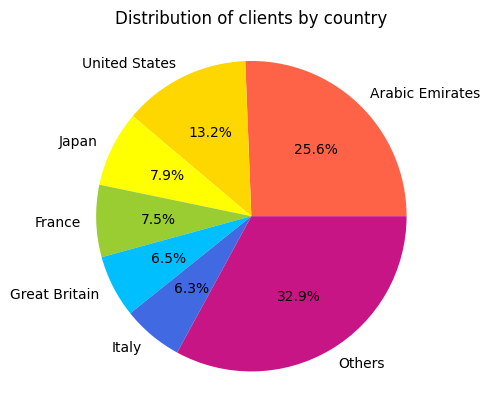

<Figure size 800x1000 with 0 Axes>

In [120]:
labels = 'Arabic Emirates', 'United States', 'Japan', 'France', 'Great Britain', 'Italy', 'Others'
sizes = [25.6, 13.2, 7.9, 7.5, 6.5, 6.3, 32.9]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%'
       , colors=['tomato', 'gold', 'yellow', 'yellowgreen', 'deepskyblue', 'royalblue', 'mediumvioletred']
       , radius=1.05)

plt.title('Distribution of clients by country')
plt.figure(figsize=(8,10))
plt.show()